In [1]:
import mnist_util as mu
import numpy as np
from random import randint
from scipy.stats import multivariate_normal
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
train, train_labels, test, test_labels = mu.get_np_array()

showing picture number: 44118


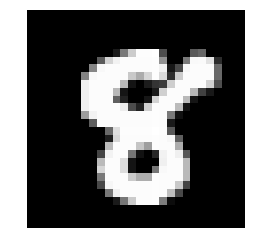

In [3]:
rnd = randint(0, len(train)-1)
print("showing picture number: {rnd}".format(rnd=rnd))
mu.show_a_num(train[rnd])

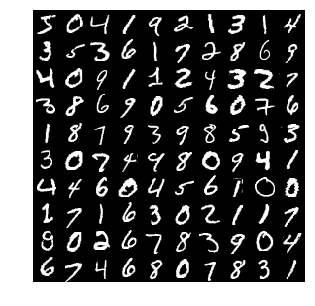

In [4]:
testing = train[:100]
mu.show_nums(testing, xsize=5, ysize=5)

In [5]:
num_arrays = mu.get_all_nums(train, train_labels)

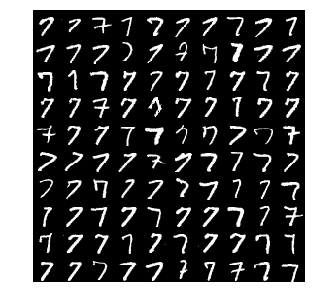

In [6]:
num = num_arrays[7]
mu.show_nums(num[:100], xsize=5, ysize=5)

In [7]:
mys = [np.mean(num_arrays[i], axis=0) for i in range(10)]

sigma_id  = np.identity(784)
sigma_var = [np.var(num_arrays[i]) for i in range(10)]
sigma_cov = [np.cov(num_arrays[i].T) for i in range(10)]

In [8]:
p_id  = [multivariate_normal(mean=mys[i], cov=sigma_id)     for i in range(10)]
p_var = [multivariate_normal(mean=mys[i], cov=sigma_var[i]) for i in range(10)]
p_cov = [multivariate_normal(mean=mys[i], cov=sigma_cov[i], allow_singular=True) for i in range(10)]

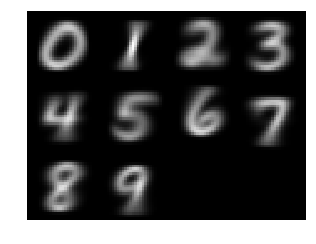

In [9]:
mu.show_nums(np.array(mys), xsize=5, ysize=5)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p0_id  = p_id[0]
p0_var = p_var[0]
p0_cov = p_cov[0]

X, Y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, p0_id.logpdf(pos),cmap='viridis',linewidth=0)

In [ ]:
for i in range(10):
    print("Logpdf of number {num}".format(num=i))
    print(p_id[i].logpdf(test[0]))
    print(p_var[i].logpdf(test[0]))
    print(p_cov[i].logpdf(test[0]))
    print()
print("Number is {}".format(test_labels[0]))

In [ ]:
for idx, a in enumerate(test[:10]):
    real = test_labels[idx]
    pdf_id  = [p_id[i].logpdf(a) for i in range(10)]
    pdf_var = [p_var[i].logpdf(a) for i in range(10)]
    pdf_cov = [p_cov[i].logpdf(a) for i in range(10)]

    max_id  = max(pdf_id)
    max_var = max(pdf_var)
    max_cov = max(pdf_cov)

    print(idx)
    print("Id  guess: {}".format(pdf_id.index(max_id)))
    print("Var guess: {}".format(pdf_var.index(max_var)))
    print("Cov guess: {}".format(pdf_cov.index(max_cov)))
    print("Answer: ...{}...".format(real))
    print()

In [10]:
result_id  = []
result_var = []
result_cov = []
for idx, val in enumerate(test):
    real = test_labels[idx]
    pdf_id  = [p_id[i].logpdf(val)  for i in range(10)]
    pdf_var = [p_var[i].logpdf(val) for i in range(10)]
    pdf_cov = [p_cov[i].logpdf(val) for i in range(10)]

    result_id.append(pdf_id.index(max(pdf_id)))
    result_var.append(pdf_var.index(max(pdf_var)))
    result_cov.append(pdf_cov.index(max(pdf_cov)))

In [11]:
loss_id  = zero_one_loss(test_labels, result_id)
loss_var = zero_one_loss(test_labels, result_var)
loss_cov = zero_one_loss(test_labels, result_cov)

print("Loss Id:  {}".format(loss_id))
print("Loss Var: {}".format(loss_var))
print("Loss Cov: {}".format(loss_cov))

Loss Id:  0.17969999999999997
Loss Var: 0.22419999999999995
Loss Cov: 0.18620000000000003


In [12]:
cm_id  = confusion_matrix(test_labels, result_id)
cm_var = confusion_matrix(test_labels, result_var)
cm_cov = confusion_matrix(test_labels, result_cov)
classes = np.arange(10)

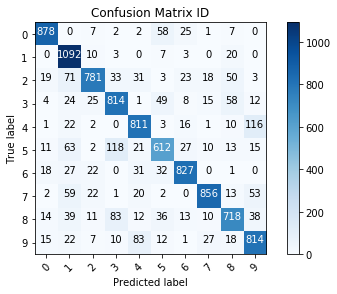

In [13]:
mu.plot_confusion_matrix(cm_id, title='Confusion Matrix ID', classes=classes)

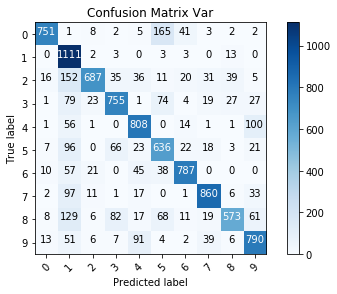

In [14]:
mu.plot_confusion_matrix(cm_var, title='Confusion Matrix Var', classes=classes)

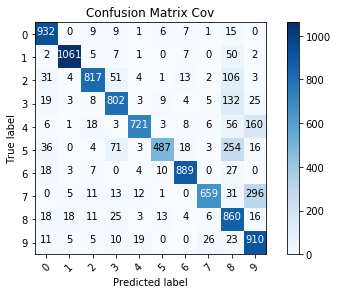

In [15]:
mu.plot_confusion_matrix(cm_cov, title='Confusion Matrix Cov', classes=classes)